In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from pathlib import Path

In [2]:
def infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

In [3]:
def SIR_mse_calc(N,contamine,susceptible,recovered):
    iterations = len(contamine)
    mse = 1000000000000
    betarange = np.linspace(0,100,101)
    gammarange = np.linspace(0,100,101)
    for pas_beta in betarange:
        beta = pas_beta/100
        for pas_gamma in gammarange:
            gamma = pas_gamma/100
            S = N - 1
            I = 1
            R = 0
            S_comp = [] # infected compartment
            I_comp = [] # susceptible compartment
            R_comp = [] # recovered compartment
            infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
            newmsi = np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean() + np.square(np.subtract(susceptible.values.tolist(),S_comp)).mean() + np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean()
            if(newmsi < mse):
                mse = newmsi
                betavalue = beta
                gammavalue = gamma
    return [mse,betavalue,gammavalue]

## Densité population 1/2

### 5000 individus

In [4]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur2/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur2/population5000"

In [5]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0     1  2233249       40      0  2281337


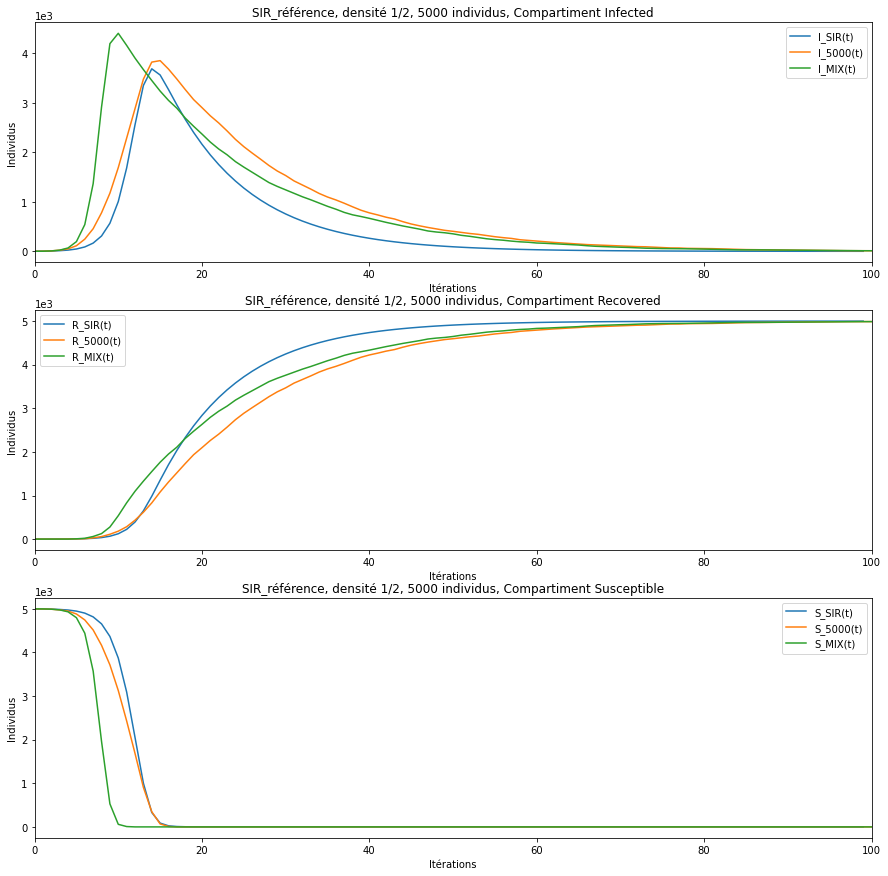

In [6]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 5000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 1
gamma = 0.1
iterations = 100

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/2, 5000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_5000, = plt.plot(recovered1, label='R_5000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/2, 5000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_5000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_5000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_5000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/2, 5000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_5000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [7]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  20858.123216800952  pour un paramètre beta =  1.0  et pour un paramètre gamma =  0.06
MSE minimal (SIR_MIX,SIR_SIR) :  684043.7816347568  pour un paramètre beta =  1.0  et pour un paramètre gamma =  0.07
MSE (I_5000,I_MIX) :  539473.7313432836


### 20000 individus

In [8]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur2/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur2/population20000"

In [9]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0     7  7681395       26      2  7681431


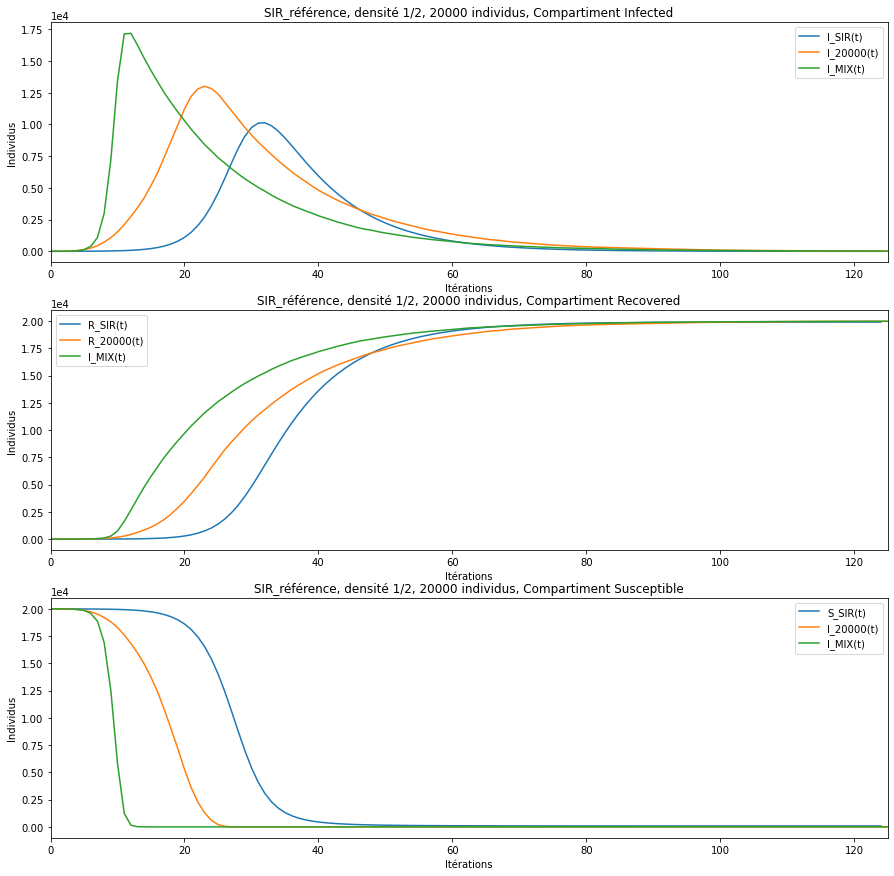

In [10]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 20000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
SIR_I, = plt.plot(I_comp, label='I_SIR(t)')
I_20000, = plt.plot(contamine1, label='I_20000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/2, 20000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_20000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_20000, = plt.plot(recovered1, label='R_20000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/2, 20000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_20000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_20000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='I_20000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='I_MIX(t)')

plt.title("SIR_référence, densité 1/2, 20000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_20000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [11]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  706369.3634018338  pour un paramètre beta =  0.73  et pour un paramètre gamma =  0.06
MSE minimal (SIR_MIX,SIR_SIR) :  10559959.471321886  pour un paramètre beta =  1.0  et pour un paramètre gamma =  0.07
MSE (I_5000,I_MIX) :  23061099.313253008


### 50000 individus

In [12]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur2/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur2/population50000"

In [13]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   643  14239028       20      8  14239701


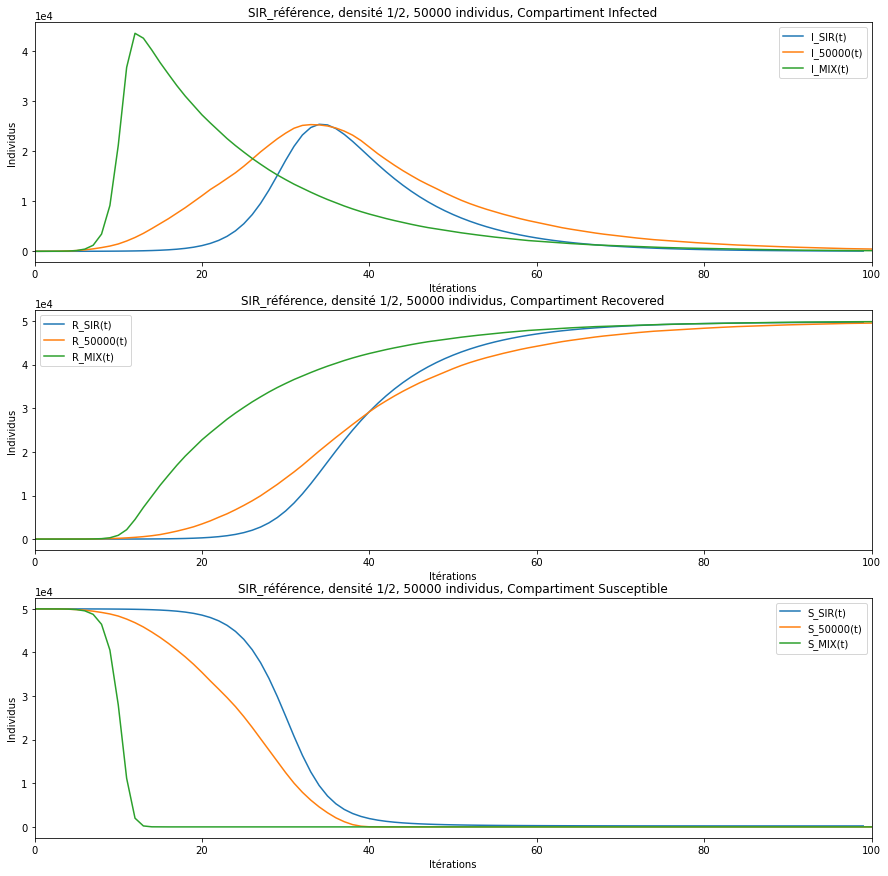

In [14]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 50000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 100

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_50000, = plt.plot(contamine1, label='I_50000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/2, 50000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_50000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_50000, = plt.plot(recovered1, label='R_50000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/2, 50000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_50000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_50000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_50000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/2, 50000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_50000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [15]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  11737486.04935725  pour un paramètre beta =  0.55  et pour un paramètre gamma =  0.07
MSE minimal (SIR_MIX,SIR_SIR) :  68553846.97565742  pour un paramètre beta =  1.0  et pour un paramètre gamma =  0.08
MSE (I_5000,I_MIX) :  251469926.55497384


### 100000 individus

In [16]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur2/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur2/population100000"

In [17]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   149  22854324        7     20  22854501


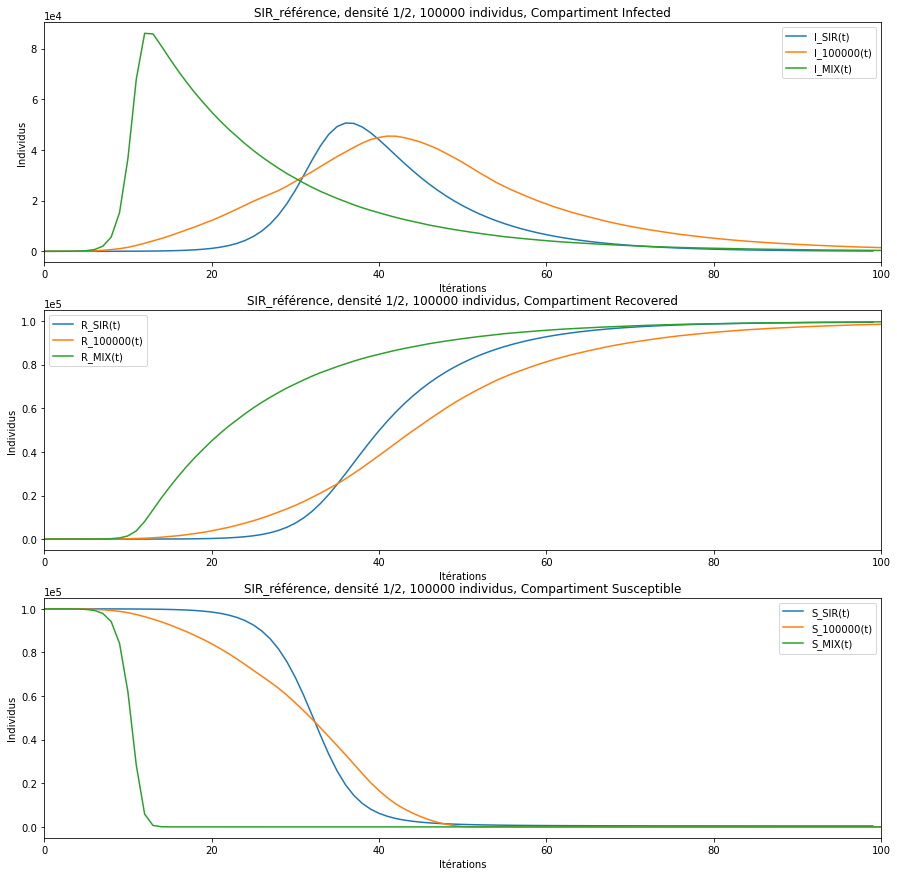

In [18]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 100

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_100000, = plt.plot(contamine1, label='I_100000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/2, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_100000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_100000, = plt.plot(recovered1, label='R_100000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/2, 100000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_100000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_100000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_100000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/2, 100000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_100000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [19]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  48643851.27678281  pour un paramètre beta =  0.47  et pour un paramètre gamma =  0.07
MSE minimal (SIR_MIX,SIR_SIR) :  384129859.94487005  pour un paramètre beta =  1.0  et pour un paramètre gamma =  0.08
MSE (I_5000,I_MIX) :  1608074672.154696


## Densité population 1/4

### 5000 individus

In [20]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur4/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur4/population5000"

In [21]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    21  2512043        0      0  2650969


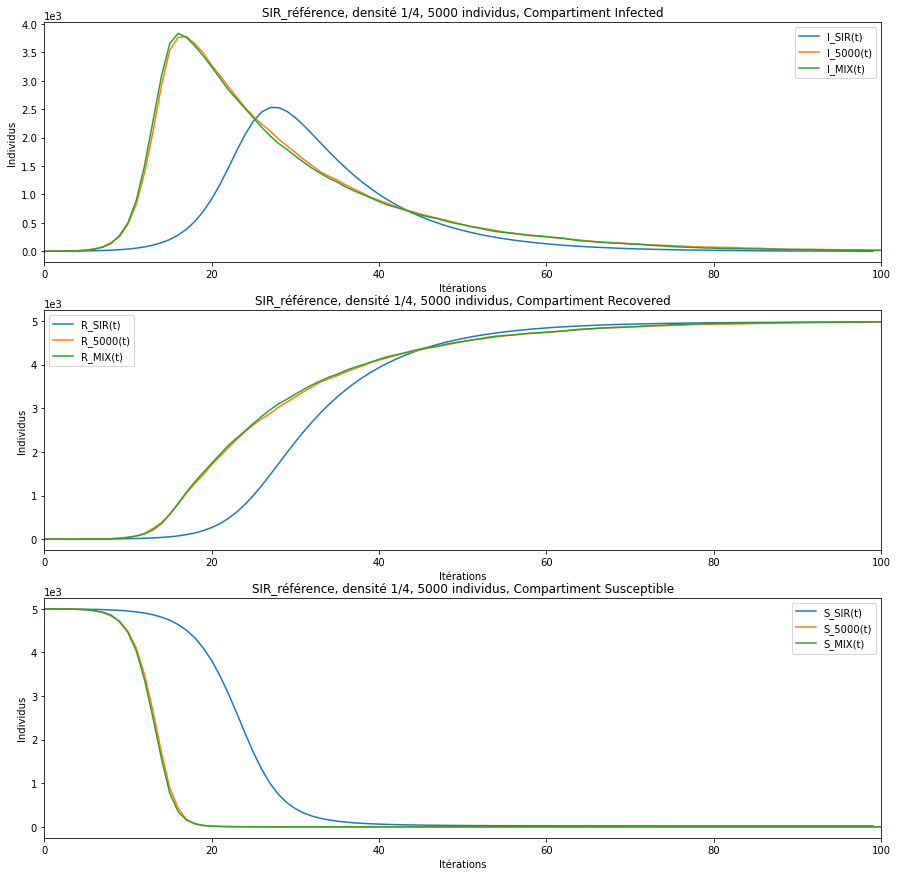

In [22]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 5000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 100

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/4, 5000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_5000, = plt.plot(recovered1, label='R_5000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/4, 5000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_5000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_5000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_5000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/4, 5000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_5000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [23]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  3498.776890314699  pour un paramètre beta =  0.84  et pour un paramètre gamma =  0.06
MSE minimal (SIR_MIX,SIR_SIR) :  5180.339472716034  pour un paramètre beta =  0.85  et pour un paramètre gamma =  0.06
MSE (I_5000,I_MIX) :  2288.651515151515


### 20000 individus

In [24]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur4/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur4/population20000"

In [25]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   512  6892357        2     22  6892894


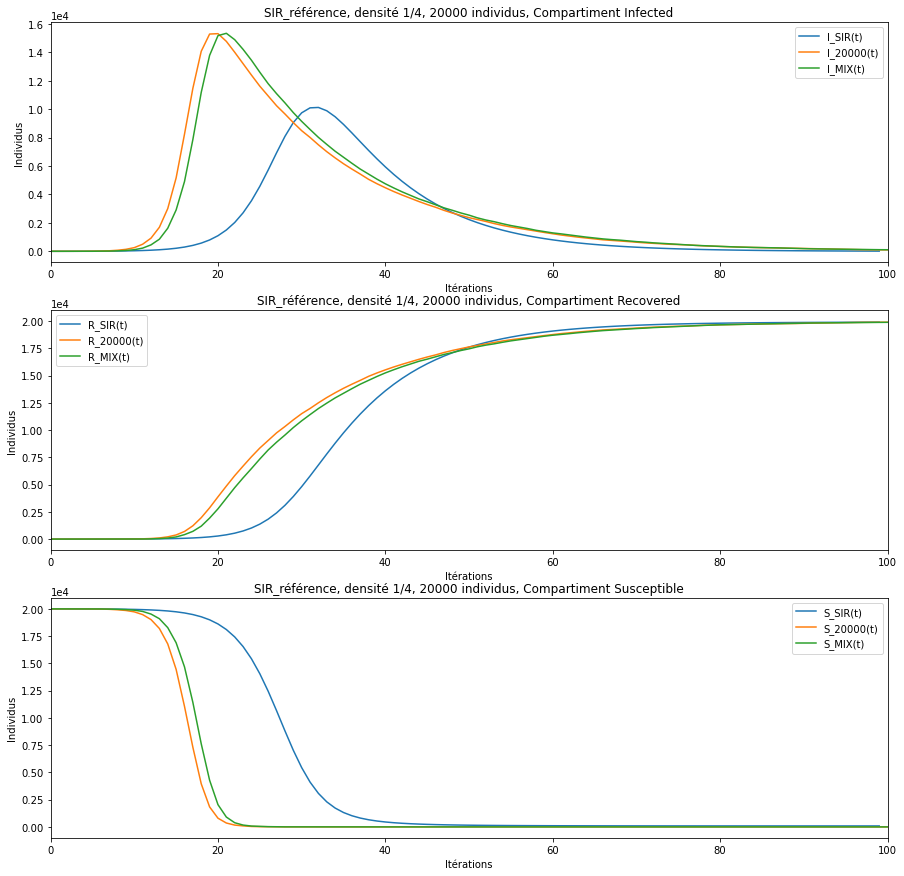

In [26]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 20000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 100

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_20000, = plt.plot(contamine1, label='I_20000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/4, 20000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_20000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_20000, = plt.plot(recovered1, label='R_20000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/4, 20000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_20000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_20000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_20000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/4, 20000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_20000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [27]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  44389.66693290811  pour un paramètre beta =  0.8  et pour un paramètre gamma =  0.06
MSE minimal (SIR_MIX,SIR_SIR) :  60875.077698989284  pour un paramètre beta =  0.74  et pour un paramètre gamma =  0.06
MSE (I_5000,I_MIX) :  862082.7162162162


### 50000 individus

In [28]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur4/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur4/population50000"

In [29]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   484  14374832       19      8  14375344


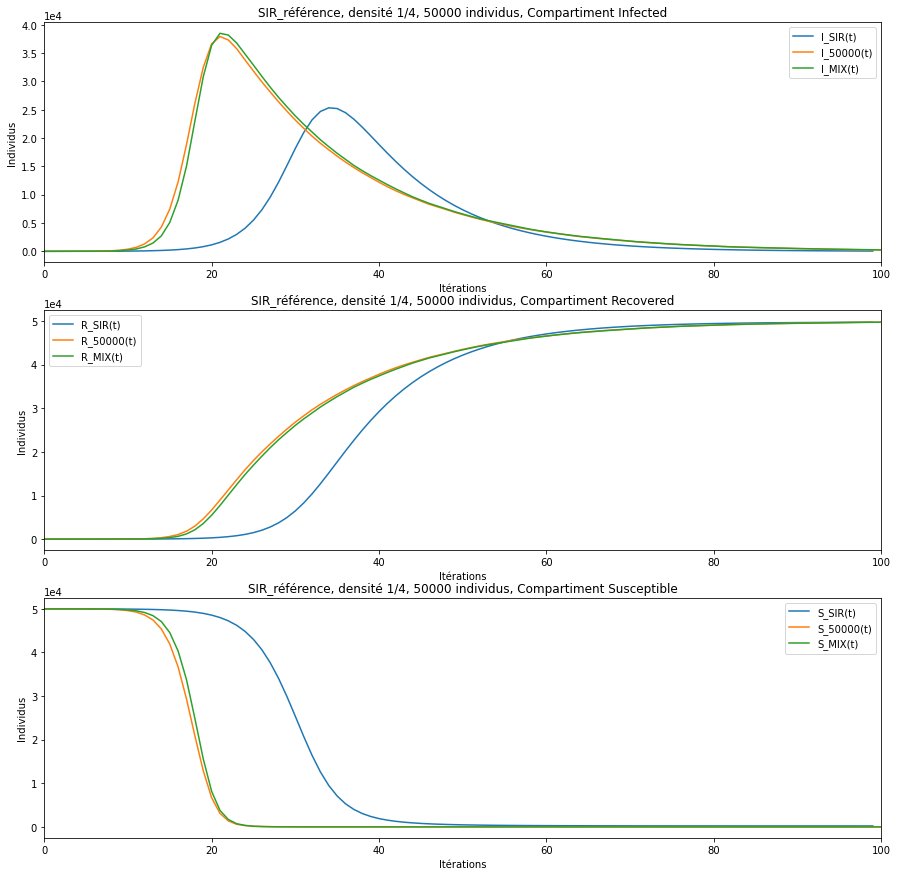

In [30]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 50000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 100

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_50000, = plt.plot(contamine1, label='I_50000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/4, 50000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_50000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_50000, = plt.plot(recovered1, label='R_50000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/4, 50000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_50000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_50000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_50000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/4, 50000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_50000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [31]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  199312.98898976605  pour un paramètre beta =  0.82  et pour un paramètre gamma =  0.06
MSE minimal (SIR_MIX,SIR_SIR) :  169331.09719700782  pour un paramètre beta =  0.79  et pour un paramètre gamma =  0.06
MSE (I_5000,I_MIX) :  818669.5028248588


### 100000 individus

In [32]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur4/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur4/population100000"

In [33]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   170  22163024        2     11  22891400


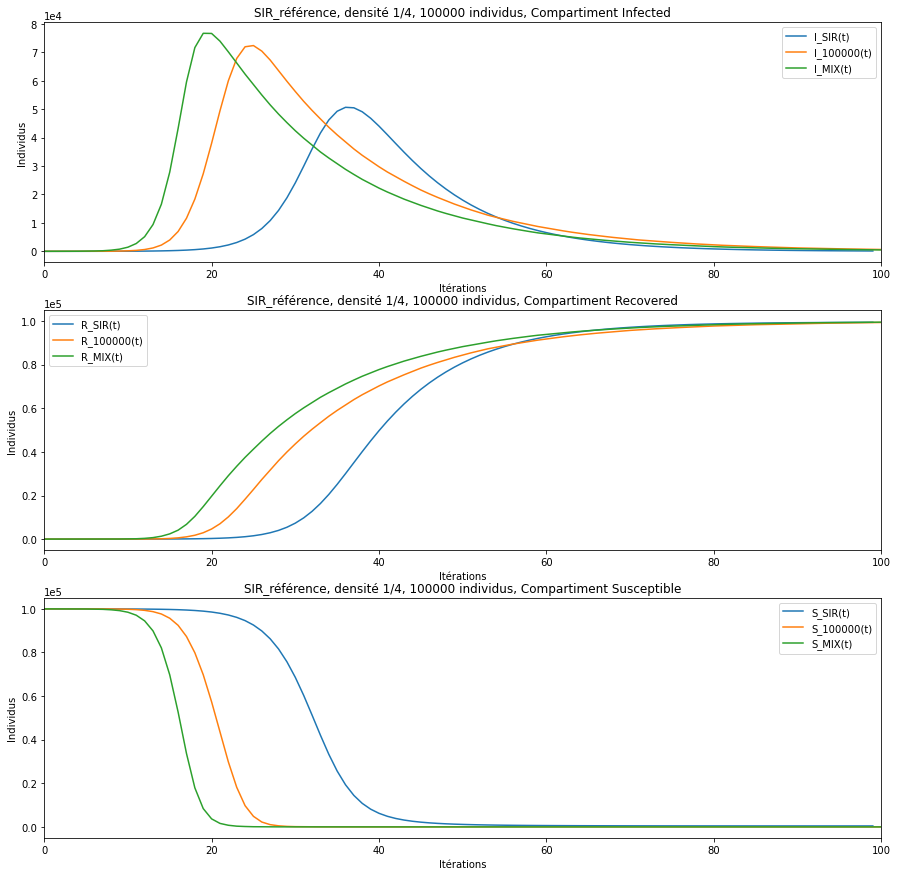

In [34]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 100

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_100000, = plt.plot(contamine1, label='I_100000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/4, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_100000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_100000, = plt.plot(recovered1, label='R_100000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/4, 100000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_100000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_100000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_100000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/4, 100000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_100000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [35]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  1092131.9643590772  pour un paramètre beta =  0.74  et pour un paramètre gamma =  0.06
MSE minimal (SIR_MIX,SIR_SIR) :  1316269.8872989947  pour un paramètre beta =  0.97  et pour un paramètre gamma =  0.06
MSE (I_5000,I_MIX) :  189161066.7121951


## Densité population 1/8

### 5000 individus

In [156]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur8/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur8/population5000"

In [157]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init     Run  Mesures  Close   Total
0     1  287726        0      0  297412


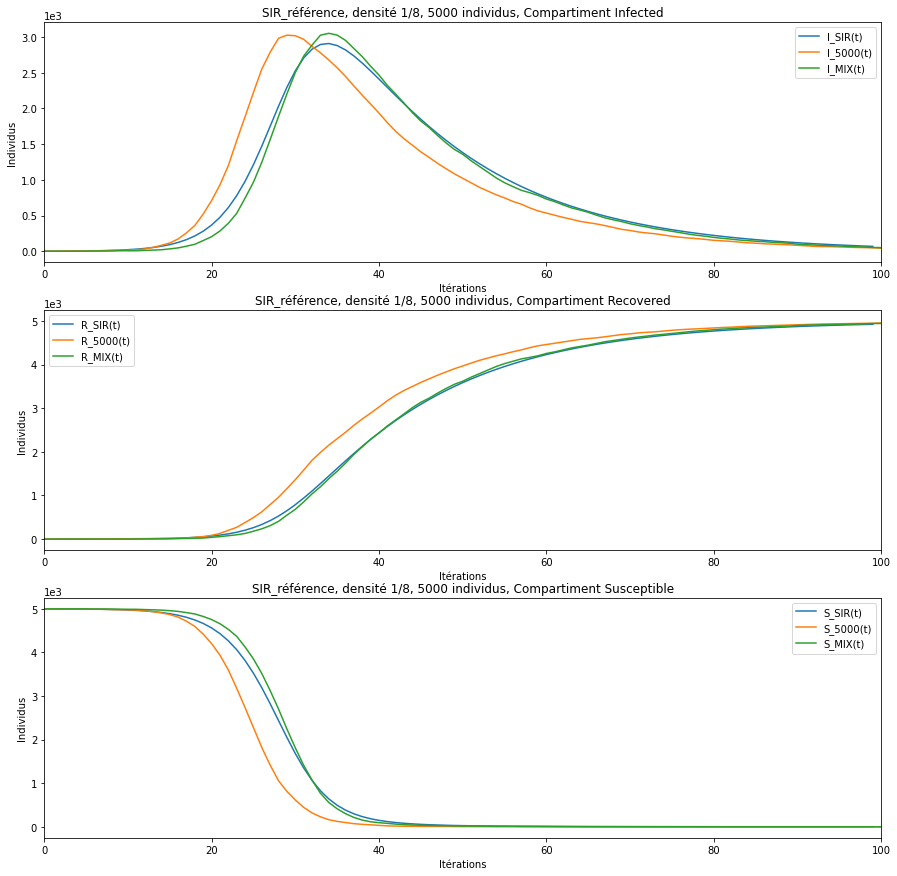

In [158]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 5000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.39
gamma = 0.06
iterations = 100

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/8, 5000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_5000, = plt.plot(recovered1, label='R_5000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/8, 5000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_5000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_5000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_5000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/8, 5000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_5000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

<Figure size 1080x1080 with 0 Axes>

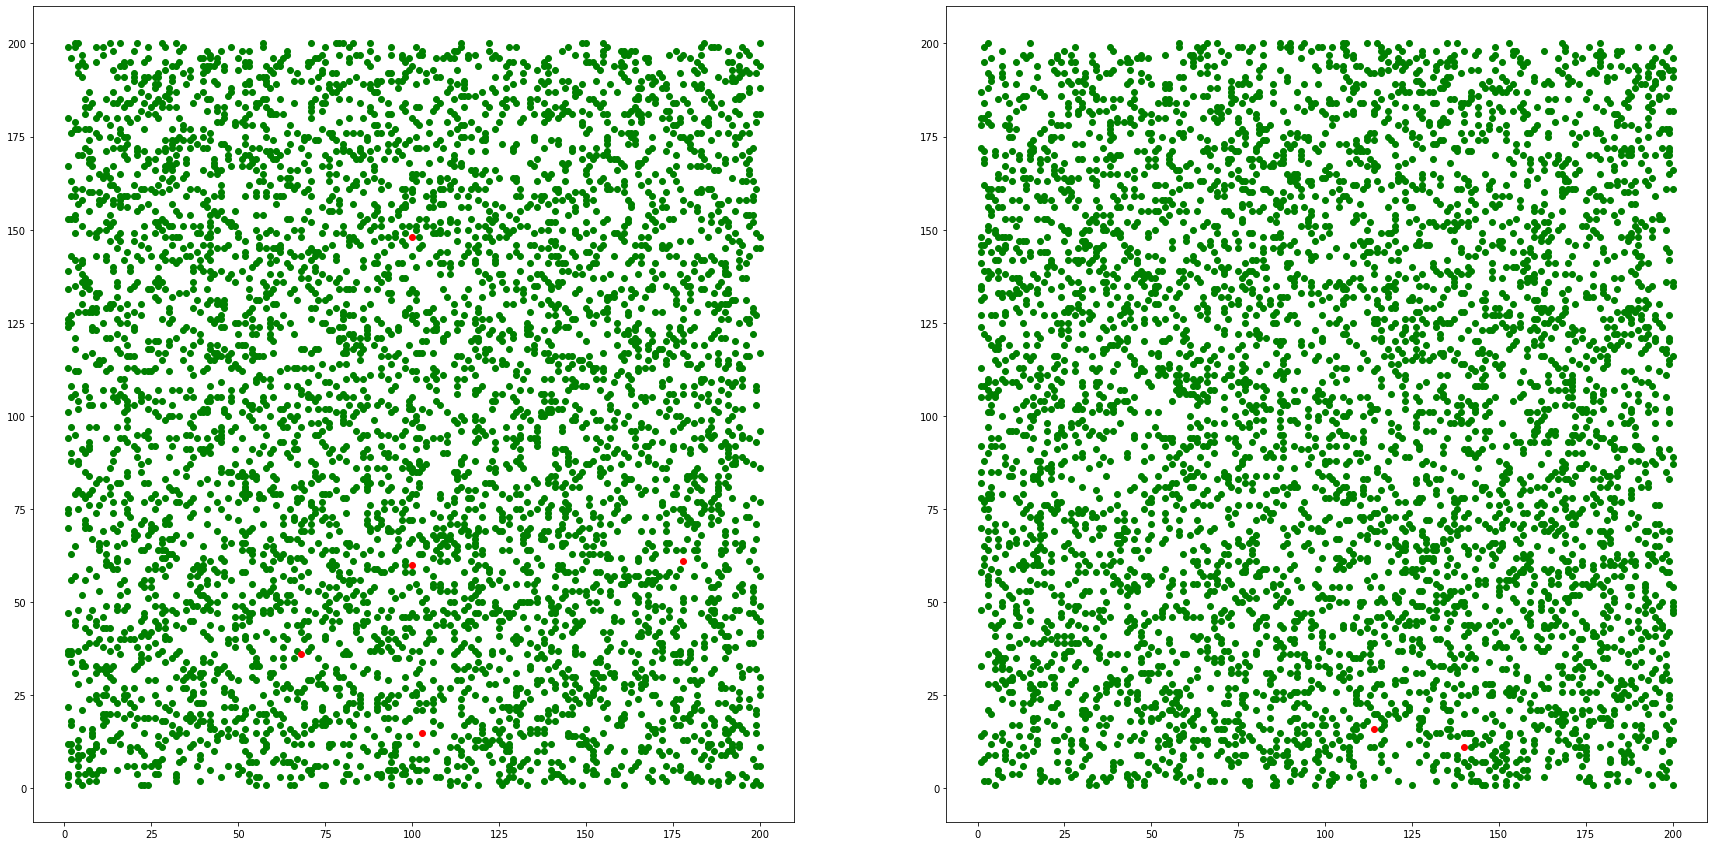

In [159]:
iteration = 4

#5000
IX1 = pd.read_csv(path1 + "/data_csv/IX.csv", dtype=int)
IY1 = pd.read_csv(path1 + "/data_csv/IY.csv", dtype=int)
figure = plt.figure(figsize=(15, 15))
vx1_Sain = [element for element in IX1.loc[iteration].values if element > 0]
vx1_Infected = [-element for element in IX1.loc[iteration].values if element < 0]
vy1_Sain = [element for element in IY1.loc[iteration].values if element > 0]
vy1_Infected = [-element for element in IY1.loc[iteration].values if element < 0]

#MIX
IX2 = pd.read_csv(path2 + "/data_csv/IX.csv", dtype=int)
IY2 = pd.read_csv(path2 + "/data_csv/IY.csv", dtype=int)
figure = plt.figure(figsize=(30, 15))
vx2_Sain = [element for element in IX2.loc[iteration].values if element > 0]
vx2_Infected = [-element for element in IX2.loc[iteration].values if element < 0]
vy2_Sain = [element for element in IY2.loc[iteration].values if element > 0]
vy2_Infected = [-element for element in IY2.loc[iteration].values if element < 0]

plt.subplot(1,2,1)
plt.scatter(vx1_Sain,vy1_Sain, color='green')
plt.scatter(vx1_Infected,vy1_Infected, color='red')
plt.subplot(1,2,2)
plt.scatter(vx2_Sain,vy2_Sain, color='green')
plt.scatter(vx2_Infected,vy2_Infected, color='red')
plt.show()


### MSE

In [39]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  4218.3903307238825  pour un paramètre beta =  0.44  et pour un paramètre gamma =  0.06
MSE minimal (SIR_MIX,SIR_SIR) :  9698.09933722254  pour un paramètre beta =  0.39  et pour un paramètre gamma =  0.06
MSE (I_5000,I_MIX) :  278311.40828402364


### 20000 individus

In [40]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur8/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur8/population20000"

In [41]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   452  8593769        2     22  8594245


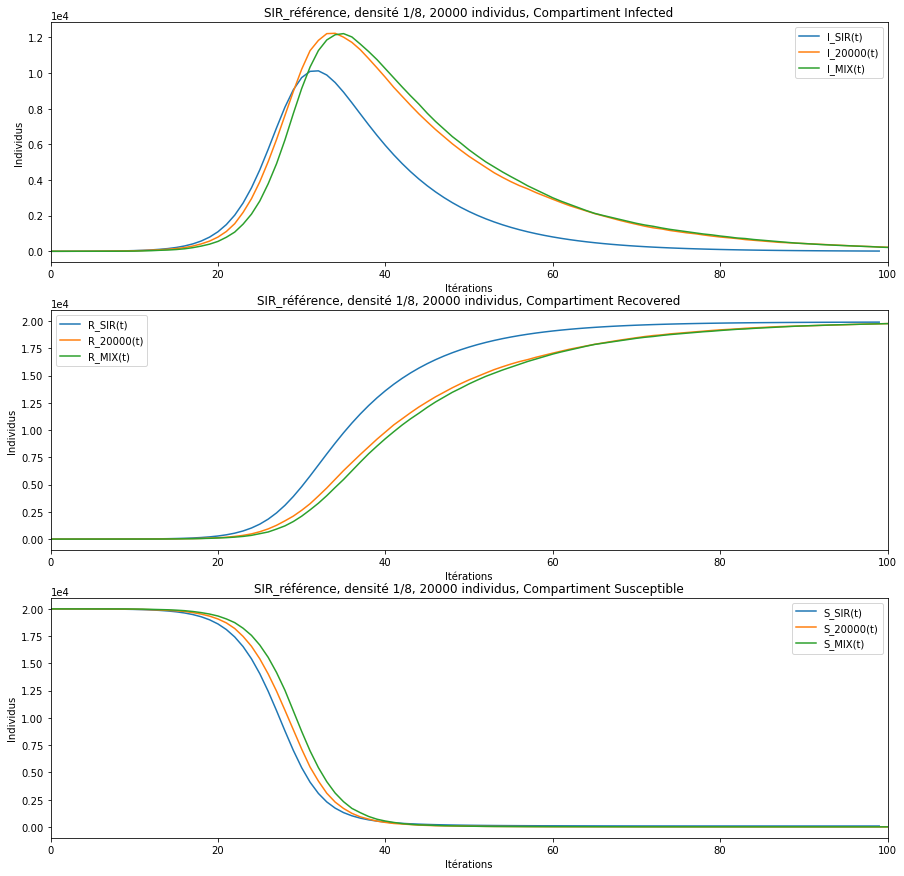

In [42]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 20000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 100

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_20000, = plt.plot(contamine1, label='I_20000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/8, 20000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_20000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_20000, = plt.plot(recovered1, label='R_20000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/8, 20000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_20000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_20000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_20000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/8, 20000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_20000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [43]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  29124.186741135425  pour un paramètre beta =  0.45  et pour un paramètre gamma =  0.06
MSE minimal (SIR_MIX,SIR_SIR) :  52535.335805416384  pour un paramètre beta =  0.43  et pour un paramètre gamma =  0.06
MSE (I_5000,I_MIX) :  274837.3631284916


### 50000 individus

In [44]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur8/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur8/population50000"

In [45]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   294  16261726        5      6  16262033


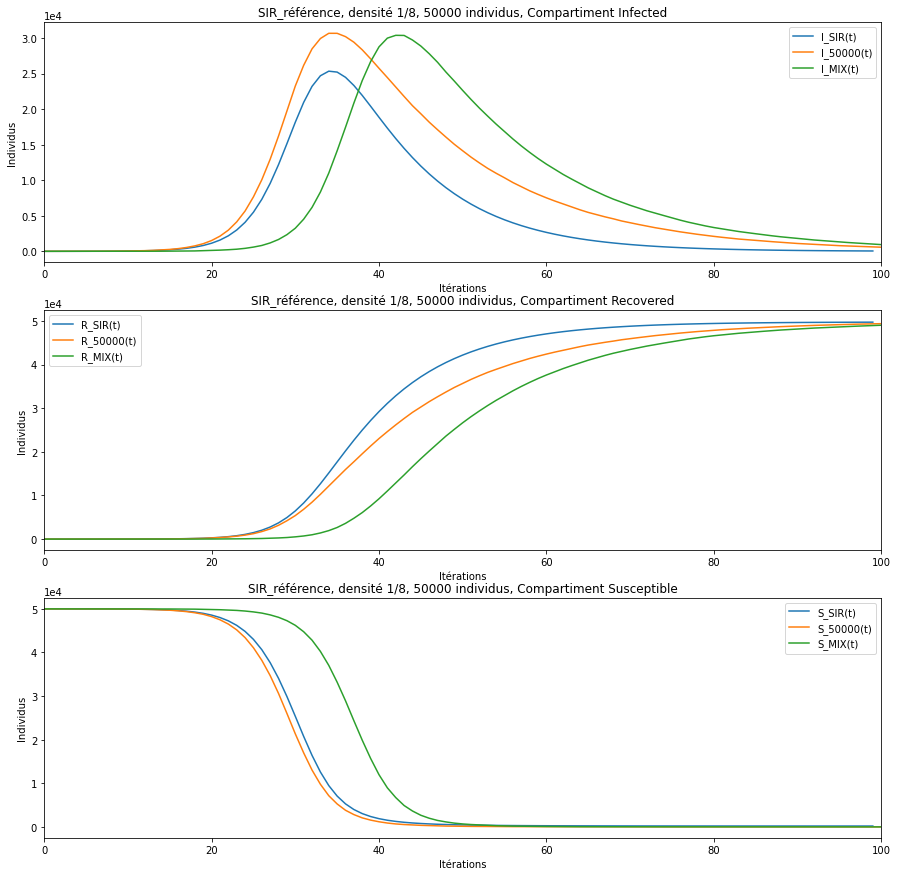

In [46]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 50000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 100

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_50000, = plt.plot(contamine1, label='I_50000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/8, 50000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_50000, = plt.plot(recovered1, label='R_50000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/8, 50000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_5000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_50000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_50000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/8, 50000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_5000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [47]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  248040.3585800511  pour un paramètre beta =  0.48  et pour un paramètre gamma =  0.06
MSE minimal (SIR_MIX,SIR_SIR) :  877986.121740964  pour un paramètre beta =  0.38  et pour un paramètre gamma =  0.06
MSE (I_5000,I_MIX) :  81749776.8888889


### 100000 individus

In [48]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur8/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur8/population100000"

In [49]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   930  24295875        4     12  24296822


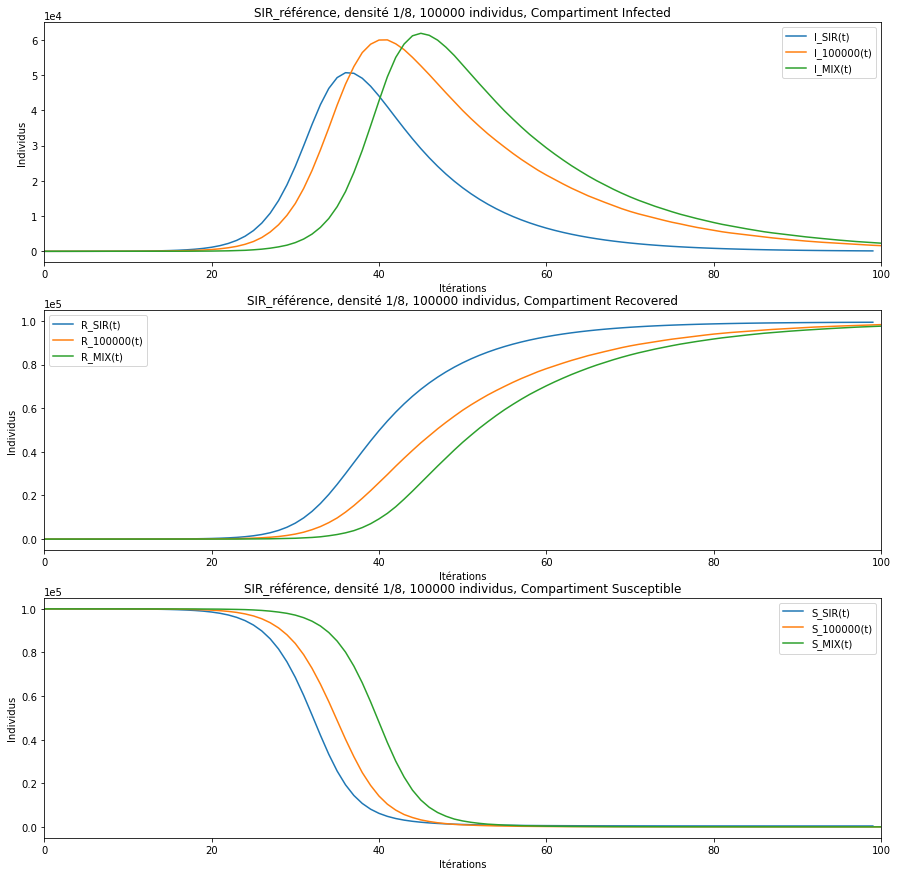

In [50]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 100

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_100000, = plt.plot(contamine1, label='I_100000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_100000, = plt.plot(recovered1, label='R_100000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/8, 100000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_5000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_100000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_100000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/8, 100000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_5000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [51]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  558398.1149225163  pour un paramètre beta =  0.43  et pour un paramètre gamma =  0.06
MSE minimal (SIR_MIX,SIR_SIR) :  3676176.8526638476  pour un paramètre beta =  0.38  et pour un paramètre gamma =  0.06
MSE (I_5000,I_MIX) :  120326363.56410256


## Densité population 1/16

### 5000 individus

In [52]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur16/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur16/population5000"

In [53]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0     1  3353909        0     23  3407994


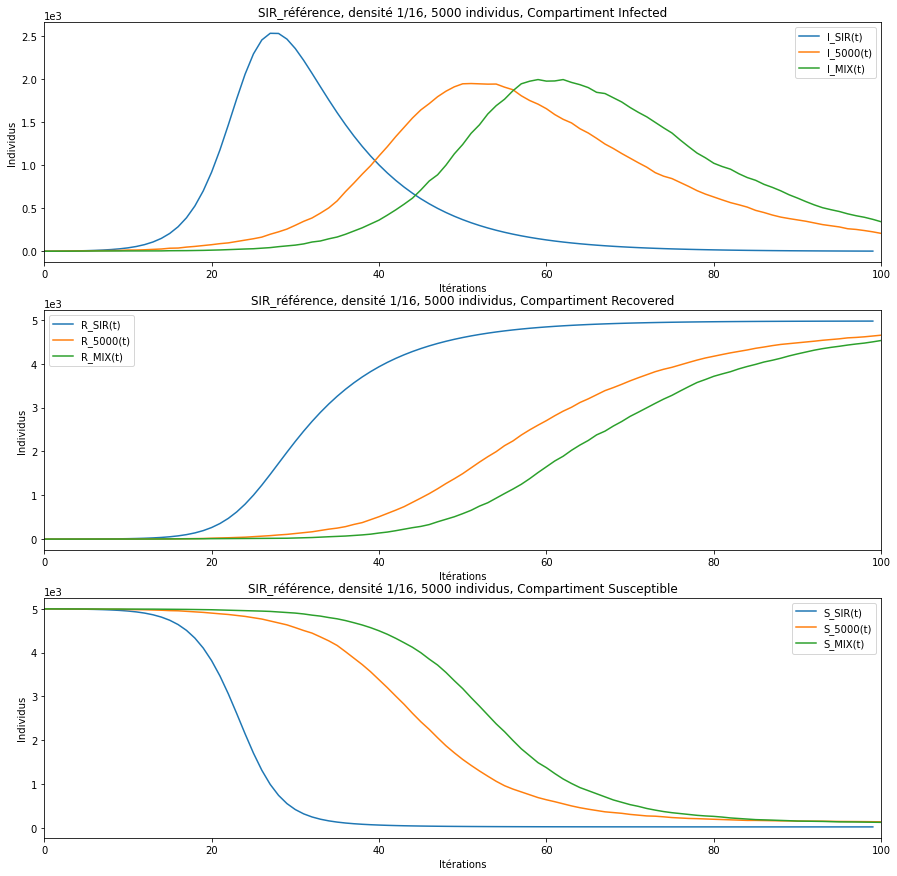

In [54]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 5000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 100

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/16, 5000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_5000, = plt.plot(recovered1, label='R_5000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/16, 5000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_5000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_5000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_5000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/16, 5000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_5000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [55]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  15702.760234156613  pour un paramètre beta =  0.26  et pour un paramètre gamma =  0.07
MSE minimal (SIR_MIX,SIR_SIR) :  18576.626046306992  pour un paramètre beta =  0.22  et pour un paramètre gamma =  0.06
MSE (I_5000,I_MIX) :  492326.0


### 20000 individus

In [56]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur16/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur16/population20000"

In [57]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    10  9455279        2      2  9455294


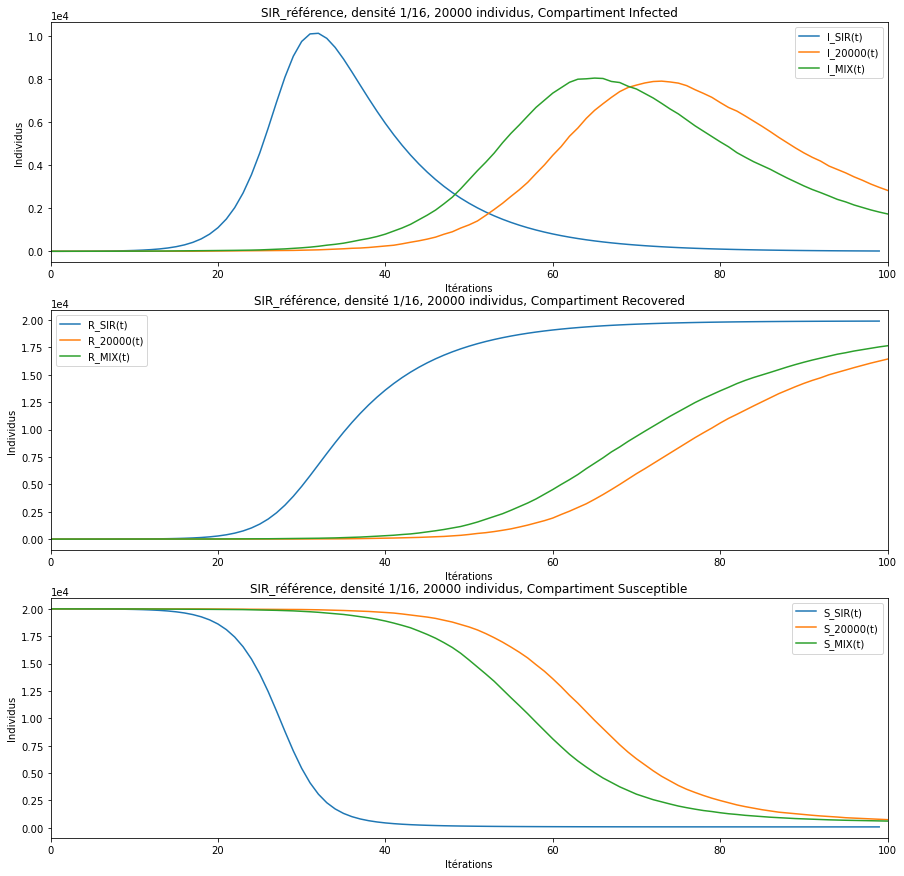

In [58]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 20000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 100

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_20000, = plt.plot(contamine1, label='I_20000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/16, 20000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_20000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_20000, = plt.plot(recovered1, label='R_20000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/16, 20000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_20000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_20000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_20000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/16, 20000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_20000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [59]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  124410.03006290844  pour un paramètre beta =  0.22  et pour un paramètre gamma =  0.06
MSE minimal (SIR_MIX,SIR_SIR) :  31722.724428990652  pour un paramètre beta =  0.24  et pour un paramètre gamma =  0.06
MSE (I_5000,I_MIX) :  4680892.123893806


### 50000 individus

In [60]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur16/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur16/population50000"

In [61]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   697  17621603        5     22  17622328


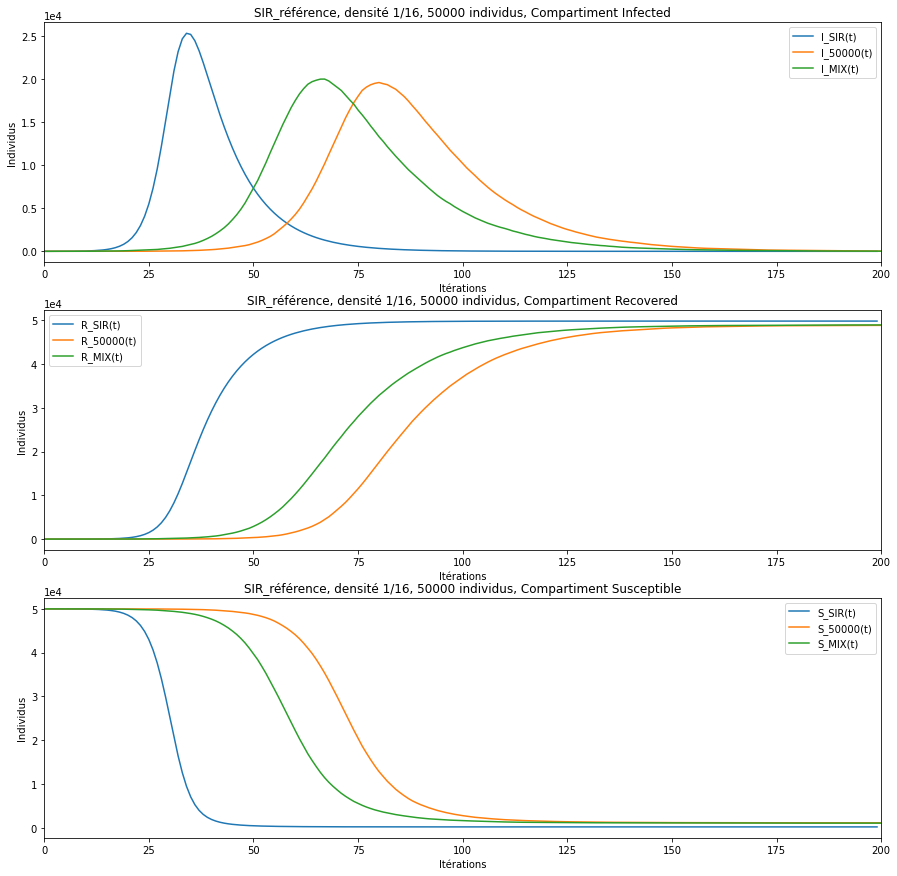

In [62]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 50000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 200

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_50000, = plt.plot(contamine1, label='I_50000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/16, 50000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_50000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_50000, = plt.plot(recovered1, label='R_50000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/16, 50000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_50000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_50000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_50000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/16, 50000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_50000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [63]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  2963986.144510907  pour un paramètre beta =  0.22  et pour un paramètre gamma =  0.06
MSE minimal (SIR_MIX,SIR_SIR) :  741350.8581859726  pour un paramètre beta =  0.26  et pour un paramètre gamma =  0.07
MSE (I_5000,I_MIX) :  90403266.4497992


### 100000 individus

In [64]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/5000mouvements/densite1sur16/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Reference/perfect_mix/densite1sur16/population100000"

In [65]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   724  24911966        4      9  24912704


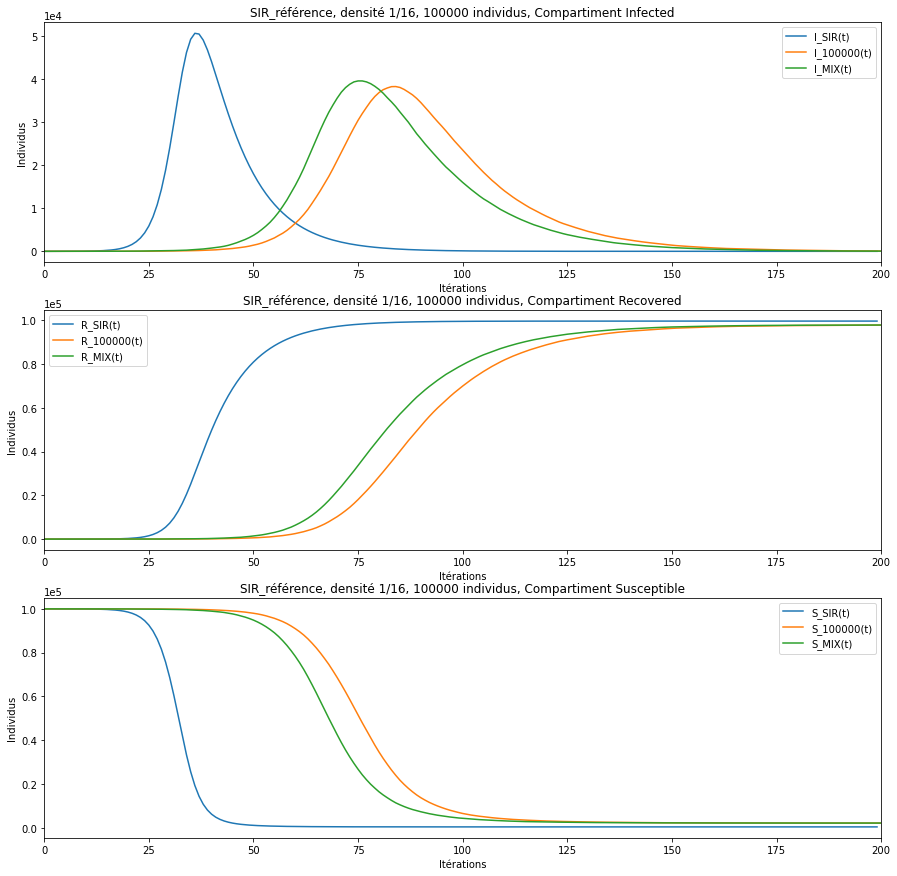

In [66]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 200

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations, I_comp, S_comp, R_comp, beta, gamma)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_SIR, = plt.plot(I_comp, label='I_SIR(t)')
I_100000, = plt.plot(contamine1, label='I_100000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SIR_référence, densité 1/16, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SIR, I_100000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_SIR, = plt.plot(R_comp, label='R_SIR(t)')
R_100000, = plt.plot(recovered1, label='R_100000(t)')
R_MIX, = plt.plot(recovered2, label='R_MIX(t)')

plt.title("SIR_référence, densité 1/16, 100000 individus, Compartiment Recovered")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_SIR, R_100000, R_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_SIR, = plt.plot(S_comp, label='S_SIR(t)')
S_100000, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_100000(t)')
S_MIX, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_MIX(t)')

plt.title("SIR_référence, densité 1/16, 100000 individus, Compartiment Susceptible")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_SIR, S_100000, S_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

### MSE

In [67]:
susceptible1 = (N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered'])
mse1 = SIR_mse_calc(N,contamine1,susceptible1,recovered1)
print("MSE minimal (SIR_5000,SIR_SIR) : ", mse1[0], " pour un paramètre beta = ", mse1[1], " et pour un paramètre gamma = ", mse1[2])

susceptible2 = (N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered'])
mse2 = SIR_mse_calc(N,contamine2,susceptible2,recovered2)
print("MSE minimal (SIR_MIX,SIR_SIR) : ", mse2[0], " pour un paramètre beta = ", mse2[1], " et pour un paramètre gamma = ", mse2[2])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
    recovered2 = recovered2[:len(recovered1)]
    susceptible2 = susceptible2[:len(susceptible1)]
else:
    contamine1 = contamine1[:len(contamine2)]
    recovered1 = recovered1[:len(recovered2)]
    susceptible1 = susceptible1[:len(susceptible2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean() + np.square(np.subtract(recovered1['Recovered'].values.tolist(),recovered2['Recovered'].values.tolist())).mean() + np.square(np.subtract(susceptible1.values.tolist(),susceptible2.values.tolist())).mean())

MSE minimal (SIR_5000,SIR_SIR) :  982205.2188283572  pour un paramètre beta =  0.22  et pour un paramètre gamma =  0.06
MSE minimal (SIR_MIX,SIR_SIR) :  2585805.517669079  pour un paramètre beta =  0.24  et pour un paramètre gamma =  0.06
MSE (I_5000,I_MIX) :  95108419.50570342
